<a href="https://colab.research.google.com/github/scottspurlock/csc4422-2022s/blob/main/day05_tutorial_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 5 Tutorial: K Nearest Neighbors (KNN)
This tutorial introduces the scikit learn library and explores how to use the knn classifier.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# This is the classic iris dataset (1936)
# Read more: https://archive.ics.uci.edu/ml/datasets/Iris
file_link = 'https://drive.google.com/uc?export=download&id=1UZTj2GjSTFiBqAeOXiroTxviy_zLxLpL'
df = pd.read_csv(file_link)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Terminology
The data set has 150 rows, or examples, each with 4 columns, or attributes. The last column, class, indicates the class label (or target variable). This data set has 3 distinct classes, as shown below.

In [3]:
# Turn the class labels into numbers for future use
df['class'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### Naming conventions
In machine learning, a common convention is to use the variable X to hold the attribtues (or data) and y to hold the labels. 

A common mistake is to include the labels as part of the data.

In [4]:
# Separate out the data (X) and labels (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
print('data:', X.shape)
print(X)

# Convert the class labels into numbers
y = df['class']
print('\nlabels:', y.shape)
y

data: (150, 4)
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

labels: (150,)


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

### We can plot one attribute of the data vs another, e.g., petal length vs petal width, and use color to indicate the class label.

Processing class: Iris-setosa
Processing class: Iris-versicolor
Processing class: Iris-virginica


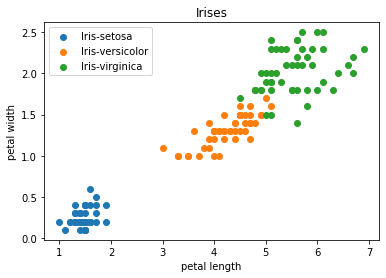

In [5]:
# To visualize each of the 3 classes as a different color, we can plot the rows
# of each class label separately.
for c in y.unique():
    print('Processing class:', c)
    curr_data = X[y == c]
    plt.scatter(curr_data['petal_length'], curr_data['petal_width'], label=c)

plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.title('Irises')
plt.show()

## For a much more impressive visualization, we can use the seaborn library, which wraps matplotlib with higher-level functionality.

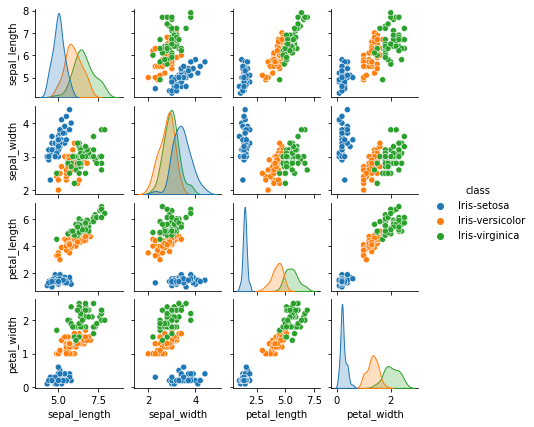

In [6]:
import seaborn as sns
sns.pairplot(df, hue='class', height=1.5);

# Sci-kit Learn

Step 1 for classification is generally to split your data and labels into random training and testing sets.

To keep results reproducible, it's usually a good idea to set the random state (or random seed) to a known value so that we get the same results every time.

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=13)
print('Xtrain.shape:', Xtrain.shape)
print('ytrain.shape:', ytrain.shape)
print('Xtest.shape:', Xtest.shape)
print('ytest.shape:', ytest.shape)

Xtrain.shape: (75, 4)
ytrain.shape: (75,)
Xtest.shape: (75, 4)
ytest.shape: (75,)


Next we make a new KNN classifier, specifying two important hyperparameters, number of neighbors (k) and distance metric, and fit the model to our data. Typically we run experiments to find the best values of the hyperparameters.

With KNN, the fitting step doesn't really do much, since KNN is a "lazy learner," but with other types of models, this step can take a while.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
model.fit(Xtrain, ytrain)


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

Once we have a fit model, then we can use it to predict the class label of new examples.

In [9]:
ypred = model.predict(Xtest)
ypred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris

By comparing the model predictions on the test set vs the actual ("ground truth") labels, we can measure the model accuracy.

In [10]:
ytest

55     Iris-versicolor
64     Iris-versicolor
21         Iris-setosa
101     Iris-virginica
112     Iris-virginica
            ...       
48         Iris-setosa
20         Iris-setosa
35         Iris-setosa
50     Iris-versicolor
57     Iris-versicolor
Name: class, Length: 75, dtype: object

In [11]:
ypred == ytest

55     True
64     True
21     True
101    True
112    True
       ... 
48     True
20     True
35     True
50     True
57     True
Name: class, Length: 75, dtype: bool

There's a built-in function to help.

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)


0.9466666666666667

## Confusion Matrix
While the accuracy is an important number, we can get more insight from a confusion matrix, which shows the specific kinds of errors our model is making. The matrix rows indicate the actual ("ground truth") class, and the columns indicate the predicted class.

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
print(cm)

[[25  0  0]
 [ 0 22  1]
 [ 0  3 24]]


A confusion matrix is generally better visualized as a heatmap.

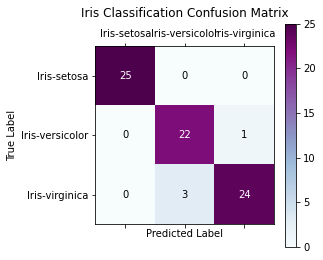

In [14]:
label_list = model.classes_

plt.matshow(cm, cmap='BuPu')
plt.colorbar()
plt.grid(False)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(np.arange(len(label_list)), label_list)
plt.yticks(np.arange(len(label_list)), label_list)
plt.title('Iris Classification Confusion Matrix', pad=20)

# Add text to show counts in heatmap.
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    # Make sure text color will show up
    color = 'black'
    if cm[i, j] > 0.6 * cm.max():
      color = 'white'
    plt.text(j, i, cm[i, j], ha="center", va="center", color=color)
plt.show()

## Seaborn
The Seaborn library has a very nice set of options to show a confusion matrix.

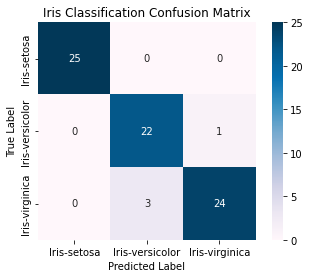

In [15]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True, cmap="PuBu",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Iris Classification Confusion Matrix')
plt.show()